In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
tf.__version__

'2.5.0'

In [7]:
tf.test.is_built_with_cuda()

True

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
y_train.shape

(60000,)

#### Data Visualization:

In [14]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

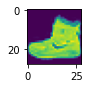

In [15]:
plot_sample(0)

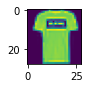

In [16]:
plot_sample(1)

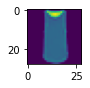

In [17]:
plot_sample(2)

In [18]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [20]:
y_test.shape

(10000,)

In [21]:
X_train.shape

(60000, 28, 28)

#### Preprocessing: Scale images

In [22]:
X_train_scaled = X_train / 25
X_test_scaled = X_test / 255

In [23]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [24]:
y_train[0:5]


array([9, 0, 0, 3, 0], dtype=uint8)

In [25]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### Model Building and training:

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train_categorical, epochs=1)

1875/1875 [==============================] - 95s 43ms/step - loss: 0.4939 - accuracy: 0.8352


In [29]:
#Let's make some prediction:

In [30]:
np.argmax(model.predict(X_test_scaled)[0])

9

In [31]:
y_test[0]

9

In [33]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])
    
    model.compile(optimizer='SGD',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

#### Measure training time on CPU

In [34]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1875/1875 [==============================] - 79s 42ms/step - loss: 0.4939 - accuracy: 0.8348
1min 19s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

#### On epochs = 10

In [36]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 79s 42ms/step - loss: 0.4973 - accuracy: 0.8338
Epoch 2/3
1875/1875 [==============================] - 85s 46ms/step - loss: 0.3385 - accuracy: 0.8765
Epoch 3/3
1875/1875 [==============================] - 89s 47ms/step - loss: 0.2970 - accuracy: 0.8917
4min 13s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [37]:

%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 81s 43ms/step - loss: 0.4939 - accuracy: 0.8362
Epoch 2/3
1875/1875 [==============================] - 84s 45ms/step - loss: 0.3389 - accuracy: 0.8773
Epoch 3/3
1875/1875 [==============================] - 89s 48ms/step - loss: 0.2953 - accuracy: 0.8924TA: 0s - loss: 0.2953 - accuracy: 0.
4min 15s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
